# •	Data exploration and pre-processing: 
1.  Data cleaning
2.  Visualization
3.  Pre-processing. 

# •	Data cleaning

In [2]:
# importing the required  libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Explore the data to understand its structure, identify the variables, and check for any missing values.

In [3]:
#importing the data 
data = pd.read_csv("C:/Users/chanu/Downloads/apy.csv") 

In [4]:
data.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
data['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [6]:
data['Season'] = data['Season'].replace('Kharif     ', 'Kharif')
data['Season'] = data['Season'].replace('Whole Year ','Whole Year')
data['Season'] = data['Season'].replace('Autumn     ', 'Autumn')
data['Season'] = data['Season'].replace('Rabi       ', 'Rabi')
data['Season'] = data['Season'].replace('Summer     ', 'Summer')
data['Season'] = data['Season'].replace('Winter     ', 'Winter')

In [11]:
data['District_Name'].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [4]:
#dimensions of the data
data.shape

(246091, 7)

In [5]:
#print the columns/features of the data
data.columns 

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
# listing the numericale features
num_cols=data.select_dtypes(include=np.number).columns
num_cols

Index(['Crop_Year', 'Area', 'Production'], dtype='object')

In [7]:
# listing the categorical features
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object')

In [8]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


Handle missing values by imputing the missing values with mean

In [9]:
# checking for missing values
data.null=data.isnull().sum()
data.null

C:\Users\chanu\AppData\Local\Temp\ipykernel_1816\1504268037.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.null=data.isnull().sum()


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
# # filling the null values with mean value of column having null values 
mean_value=data['Production'].mean()
data['Production']=data['Production'].fillna(mean_value)

In [11]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

Handle outliers:Outliers are extreme values that can skew the analysis and lead to inaccurate results.
Capping involves setting a threshold for the maximum and minimum values of a variable and replacing any 
values outside this range with the threshold value.

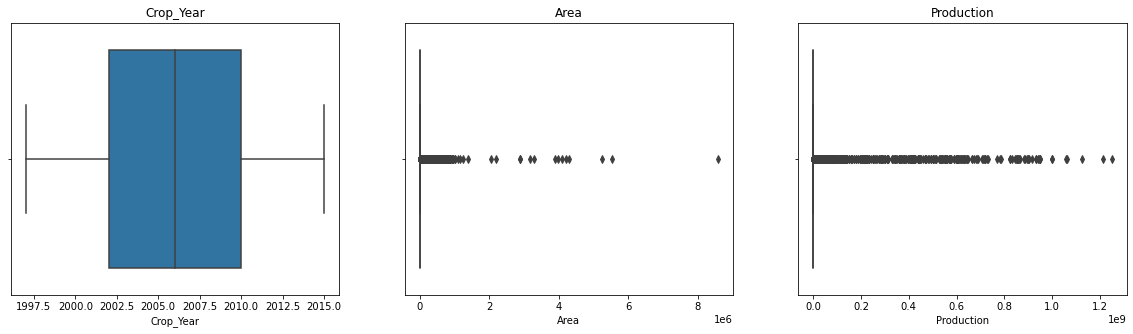

In [12]:
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots for each numeric column
fig, axs = plt.subplots(ncols=len(numeric_cols), figsize=(20, 5))

# Iterate over each numeric column and plot the outliers using boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axs[i])
    axs[i].set_title(col)

In [13]:
def cap_data(data):
    for col in data.columns:
        print("\n\n capping the \n",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            
            q1=data[col].quantile(0.25)
            q3=data[col].quantile(0.75)
            iqr=q3-q1
            lower,upper=(q1-(iqr*1.5)),(q3+(iqr*1.5))    
            print("q1=",q1,"q3=",q3,"iqr=",iqr,"lower=",lower,"upper=",upper) 
            data[col][data[col] <= lower] = lower
            data[col][data[col] >= upper] = upper
            print("\n",data[col][data[col] <= lower] )
            print("\n",data[col][data[col] >= upper] )
            
        else:
            data[col]=data[col]
    return data


final_df=cap_data(data)



 capping the 
 State_Name


 capping the 
 District_Name


 capping the 
 Crop_Year
q1= 2002.0 q3= 2010.0 iqr= 8.0 lower= 1990.0 upper= 2022.0

 Series([], Name: Crop_Year, dtype: int64)

 Series([], Name: Crop_Year, dtype: int64)


 capping the 
 Season


 capping the 
 Crop


 capping the 
 Area
q1= 80.0 q3= 4392.0 iqr= 4312.0 lower= -6388.0 upper= 10860.0

 Series([], Name: Area, dtype: float64)

 5         10860.0
14        10860.0
23        10860.0
32        10860.0
41        10860.0
           ...   
246017    10860.0
246033    10860.0
246052    10860.0
246070    10860.0
246089    10860.0
Name: Area, Length: 40707, dtype: float64


 capping the 
 Production
q1= 91.0 q3= 8000.0 iqr= 7909.0 lower= -11772.5 upper= 19863.5

 Series([], Name: Production, dtype: float64)

 5         19863.5
14        19863.5
23        19863.5
32        19863.5
41        19863.5
           ...   
245985    19863.5
246017    19863.5
246043    19863.5
246052    19863.5
246089    19863.5
Name: Production

C:\Users\chanu\AppData\Local\Temp\ipykernel_1816\3217336748.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= lower] = lower
C:\Users\chanu\AppData\Local\Temp\ipykernel_1816\3217336748.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= upper] = upper
C:\Users\chanu\AppData\Local\Temp\ipykernel_1816\3217336748.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= l

Handle duplicates: Remove any duplicate data points to avoid any bias in the analysis.

In [14]:
# identify duplicate rows based on all columns
duplicates = data[data.duplicated()]

# keep the first instance of each duplicate row
data.drop_duplicates(keep='first', inplace=True)

# print the updated DataFrame
print(data)

                         State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop     Area  Production  
0                  Areca

In [15]:
# data['District_Name'].unique()

In [16]:
# state_mapping = {'Andaman and Nicobar Islands':0, 'Andhra Pradesh':1,
#        'Arunachal Pradesh':2, 'Assam':3, 'Bihar':4, 'Chandigarh':5,
#        'Chhattisgarh':6, 'Dadra and Nagar Haveli':7, 'Goa':8, 'Gujarat':9,
#        'Haryana':10, 'Himachal Pradesh':11, 'Jammu and Kashmir ':12, 'Jharkhand':13,
#        'Karnataka':14, 'Kerala':15, 'Madhya Pradesh':16, 'Maharashtra':17, 'Manipur':18,
#        'Meghalaya':19, 'Mizoram':20, 'Nagaland':21, 'Odisha':22, 'Puducherry':23,
#        'Punjab':24, 'Rajasthan':25, 'Sikkim':26, 'Tamil Nadu':27, 'Telangana ':28,
#        'Tripura':29, 'Uttar Pradesh':30, 'Uttarakhand':31, 'West Bengal':32}

# # Use the map() function to convert the categorical variable to numerical values
# data['State_Name'] = data['State_Name'].map(state_mapping)

# # Print the updated DataFrame
# print(data)

In [17]:
# District_mapping={'NICOBARS':1, 'NORTH AND MIDDLE ANDAMAN':2, 'SOUTH ANDAMANS':3,
#        'ANANTAPUR':4, 'CHITTOOR':5, 'EAST GODAVARI':6, 'GUNTUR':7, 'KADAPA':8,
#        'KRISHNA':9, 'KURNOOL':10, 'PRAKASAM':11, 'SPSR NELLORE', 'SRIKAKULAM',
#        'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
#        'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
#        'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
#        'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
#        'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
#        'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
#        'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
#        'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
#        'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
#        'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
#        'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
#        'BHAGALPUR', 'BHOJPUR', 'BUXAR', 'DARBHANGA', 'GAYA', 'GOPALGANJ',
#        'JAMUI', 'JEHANABAD', 'KAIMUR (BHABUA)', 'KATIHAR', 'KHAGARIA',
#        'KISHANGANJ', 'LAKHISARAI', 'MADHEPURA', 'MADHUBANI', 'MUNGER',
#        'MUZAFFARPUR', 'NALANDA', 'NAWADA', 'PASHCHIM CHAMPARAN', 'PATNA',
#        'PURBI CHAMPARAN', 'PURNIA', 'ROHTAS', 'SAHARSA', 'SAMASTIPUR',
#        'SARAN', 'SHEIKHPURA', 'SHEOHAR', 'SITAMARHI', 'SIWAN', 'SUPAUL',
#        'VAISHALI', 'CHANDIGARH', 'BALOD', 'BALODA BAZAR', 'BALRAMPUR',
#        'BASTAR', 'BEMETARA', 'BIJAPUR', 'BILASPUR', 'DANTEWADA',
#        'DHAMTARI', 'DURG', 'GARIYABAND', 'JANJGIR-CHAMPA', 'JASHPUR',
#        'KABIRDHAM', 'KANKER', 'KONDAGAON', 'KORBA', 'KOREA', 'MAHASAMUND',
#        'MUNGELI', 'NARAYANPUR', 'RAIGARH', 'RAIPUR', 'RAJNANDGAON',
#        'SUKMA', 'SURAJPUR', 'SURGUJA', 'DADRA AND NAGAR HAVELI',
#        'NORTH GOA', 'SOUTH GOA', 'AHMADABAD', 'AMRELI', 'ANAND',
#        'BANAS KANTHA', 'BHARUCH', 'BHAVNAGAR', 'DANG', 'DOHAD',
#        'GANDHINAGAR', 'JAMNAGAR', 'JUNAGADH', 'KACHCHH', 'KHEDA',
#        'MAHESANA', 'NARMADA', 'NAVSARI', 'PANCH MAHALS', 'PATAN',
#        'PORBANDAR', 'RAJKOT', 'SABAR KANTHA', 'SURAT', 'SURENDRANAGAR',
#        'TAPI', 'VADODARA', 'VALSAD', 'AMBALA', 'BHIWANI', 'FARIDABAD',
#        'FATEHABAD', 'GURGAON', 'HISAR', 'JHAJJAR', 'JIND', 'KAITHAL',
#        'KARNAL', 'KURUKSHETRA', 'MAHENDRAGARH', 'MEWAT', 'PALWAL',
#        'PANCHKULA', 'PANIPAT', 'REWARI', 'ROHTAK', 'SIRSA', 'SONIPAT',
#        'YAMUNANAGAR', 'CHAMBA', 'HAMIRPUR', 'KANGRA', 'KINNAUR', 'KULLU',
#        'LAHUL AND SPITI', 'MANDI', 'SHIMLA', 'SIRMAUR', 'SOLAN', 'UNA',
#        'ANANTNAG', 'BADGAM', 'BANDIPORA', 'BARAMULLA', 'DODA',
#        'GANDERBAL', 'JAMMU', 'KARGIL', 'KATHUA', 'KISHTWAR', 'KULGAM',
#        'KUPWARA', 'LEH LADAKH', 'POONCH', 'PULWAMA', 'RAJAURI', 'RAMBAN',
#        'REASI', 'SAMBA', 'SHOPIAN', 'SRINAGAR', 'UDHAMPUR', 'BOKARO',
#        'CHATRA', 'DEOGHAR', 'DHANBAD', 'DUMKA', 'EAST SINGHBUM', 'GARHWA',
#        'GIRIDIH', 'GODDA', 'GUMLA', 'HAZARIBAGH', 'JAMTARA', 'KHUNTI',
#        'KODERMA', 'LATEHAR', 'LOHARDAGA', 'PAKUR', 'PALAMU', 'RAMGARH',
#        'RANCHI', 'SAHEBGANJ', 'SARAIKELA KHARSAWAN', 'SIMDEGA',
#        'WEST SINGHBHUM', 'BAGALKOT', 'BANGALORE RURAL', 'BELGAUM',
#        'BELLARY', 'BENGALURU URBAN', 'BIDAR', 'CHAMARAJANAGAR',
#        'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
#        'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
#        'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
#        'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
#        'YADGIR', 'ALAPPUZHA', 'ERNAKULAM', 'IDUKKI', 'KANNUR',
#        'KASARAGOD', 'KOLLAM', 'KOTTAYAM', 'KOZHIKODE', 'MALAPPURAM',
#        'PALAKKAD', 'PATHANAMTHITTA', 'THIRUVANANTHAPURAM', 'THRISSUR',
#        'WAYANAD', 'AGAR MALWA', 'ALIRAJPUR', 'ANUPPUR', 'ASHOKNAGAR',
#        'BALAGHAT', 'BARWANI', 'BETUL', 'BHIND', 'BHOPAL', 'BURHANPUR',
#        'CHHATARPUR', 'CHHINDWARA', 'DAMOH', 'DATIA', 'DEWAS', 'DHAR',
#        'DINDORI', 'GUNA', 'GWALIOR', 'HARDA', 'HOSHANGABAD', 'INDORE',
#        'JABALPUR', 'JHABUA', 'KATNI', 'KHANDWA', 'KHARGONE', 'MANDLA',
#        'MANDSAUR', 'MORENA', 'NARSINGHPUR', 'NEEMUCH', 'PANNA', 'RAISEN',
#        'RAJGARH', 'RATLAM', 'REWA', 'SAGAR', 'SATNA', 'SEHORE', 'SEONI',
#        'SHAHDOL', 'SHAJAPUR', 'SHEOPUR', 'SHIVPURI', 'SIDHI', 'SINGRAULI',
#        'TIKAMGARH', 'UJJAIN', 'UMARIA', 'VIDISHA', 'AHMEDNAGAR', 'AKOLA',
#        'AMRAVATI', 'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE',
#        'GADCHIROLI', 'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR',
#        'LATUR', 'MUMBAI', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK',
#        'OSMANABAD', 'PALGHAR', 'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI',
#        'SANGLI', 'SATARA', 'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA',
#        'WASHIM', 'YAVATMAL', 'BISHNUPUR', 'CHANDEL', 'CHURACHANDPUR',
#        'IMPHAL EAST', 'IMPHAL WEST', 'SENAPATI', 'TAMENGLONG', 'THOUBAL',
#        'UKHRUL', 'EAST GARO HILLS', 'EAST JAINTIA HILLS',
#        'EAST KHASI HILLS', 'NORTH GARO HILLS', 'RI BHOI',
#        'SOUTH GARO HILLS', 'SOUTH WEST GARO HILLS',
#        'SOUTH WEST KHASI HILLS', 'WEST GARO HILLS', 'WEST JAINTIA HILLS',
#        'WEST KHASI HILLS', 'AIZAWL', 'CHAMPHAI', 'KOLASIB', 'LAWNGTLAI',
#        'LUNGLEI', 'MAMIT', 'SAIHA', 'SERCHHIP', 'DIMAPUR', 'KIPHIRE',
#        'KOHIMA', 'LONGLENG', 'MOKOKCHUNG', 'MON', 'PEREN', 'PHEK',
#        'TUENSANG', 'WOKHA', 'ZUNHEBOTO', 'ANUGUL', 'BALANGIR',
#        'BALESHWAR', 'BARGARH', 'BHADRAK', 'BOUDH', 'CUTTACK', 'DEOGARH',
#        'DHENKANAL', 'GAJAPATI', 'GANJAM', 'JAGATSINGHAPUR', 'JAJAPUR',
#        'JHARSUGUDA', 'KALAHANDI', 'KANDHAMAL', 'KENDRAPARA', 'KENDUJHAR',
#        'KHORDHA', 'KORAPUT', 'MALKANGIRI', 'MAYURBHANJ', 'NABARANGPUR',
#        'NAYAGARH', 'NUAPADA', 'PURI', 'RAYAGADA', 'SAMBALPUR', 'SONEPUR',
#        'SUNDARGARH', 'KARAIKAL', 'MAHE', 'PONDICHERRY', 'YANAM',
#        'AMRITSAR', 'BARNALA', 'BATHINDA', 'FARIDKOT', 'FATEHGARH SAHIB',
#        'FAZILKA', 'FIROZEPUR', 'GURDASPUR', 'HOSHIARPUR', 'JALANDHAR',
#        'KAPURTHALA', 'LUDHIANA', 'MANSA', 'MOGA', 'MUKTSAR', 'NAWANSHAHR',
#        'PATHANKOT', 'PATIALA', 'RUPNAGAR', 'S.A.S NAGAR', 'SANGRUR',
#        'TARN TARAN', 'AJMER', 'ALWAR', 'BANSWARA', 'BARAN', 'BARMER',
#        'BHARATPUR', 'BHILWARA', 'BIKANER', 'BUNDI', 'CHITTORGARH',
#        'CHURU', 'DAUSA', 'DHOLPUR', 'DUNGARPUR', 'GANGANAGAR',
#        'HANUMANGARH', 'JAIPUR', 'JAISALMER', 'JALORE', 'JHALAWAR',
#        'JHUNJHUNU', 'JODHPUR', 'KARAULI', 'KOTA', 'NAGAUR', 'PALI',
#        'PRATAPGARH', 'RAJSAMAND', 'SAWAI MADHOPUR', 'SIKAR', 'SIROHI',
#        'TONK', 'UDAIPUR', 'EAST DISTRICT', 'NORTH DISTRICT',
#        'SOUTH DISTRICT', 'WEST DISTRICT', 'ARIYALUR', 'COIMBATORE',
#        'CUDDALORE', 'DHARMAPURI', 'DINDIGUL', 'ERODE', 'KANCHIPURAM',
#        'KANNIYAKUMARI', 'KARUR', 'KRISHNAGIRI', 'MADURAI', 'NAGAPATTINAM',
#        'NAMAKKAL', 'PERAMBALUR', 'PUDUKKOTTAI', 'RAMANATHAPURAM', 'SALEM',
#        'SIVAGANGA', 'THANJAVUR', 'THE NILGIRIS', 'THENI', 'THIRUVALLUR',
#        'THIRUVARUR', 'TIRUCHIRAPPALLI', 'TIRUNELVELI', 'TIRUPPUR',
#        'TIRUVANNAMALAI', 'TUTICORIN', 'VELLORE', 'VILLUPURAM',
#        'VIRUDHUNAGAR', 'ADILABAD', 'HYDERABAD', 'KARIMNAGAR', 'KHAMMAM',
#        'MAHBUBNAGAR', 'MEDAK', 'NALGONDA', 'NIZAMABAD', 'RANGAREDDI',
#        'WARANGAL', 'DHALAI', 'GOMATI', 'KHOWAI', 'NORTH TRIPURA',
#        'SEPAHIJALA', 'SOUTH TRIPURA', 'UNAKOTI', 'WEST TRIPURA', 'AGRA',
#        'ALIGARH', 'ALLAHABAD', 'AMBEDKAR NAGAR', 'AMETHI', 'AMROHA',
#        'AURAIYA', 'AZAMGARH', 'BAGHPAT', 'BAHRAICH', 'BALLIA', 'BANDA',
#        'BARABANKI', 'BAREILLY', 'BASTI', 'BIJNOR', 'BUDAUN',
#        'BULANDSHAHR', 'CHANDAULI', 'CHITRAKOOT', 'DEORIA', 'ETAH',
#        'ETAWAH', 'FAIZABAD', 'FARRUKHABAD', 'FATEHPUR', 'FIROZABAD',
#        'GAUTAM BUDDHA NAGAR', 'GHAZIABAD', 'GHAZIPUR', 'GONDA',
#        'GORAKHPUR', 'HAPUR', 'HARDOI', 'HATHRAS', 'JALAUN', 'JAUNPUR',
#        'JHANSI', 'KANNAUJ', 'KANPUR DEHAT', 'KANPUR NAGAR', 'KASGANJ',
#        'KAUSHAMBI', 'KHERI', 'KUSHI NAGAR', 'LALITPUR', 'LUCKNOW',
#        'MAHARAJGANJ', 'MAHOBA', 'MAINPURI', 'MATHURA', 'MAU', 'MEERUT',
#        'MIRZAPUR', 'MORADABAD', 'MUZAFFARNAGAR', 'PILIBHIT', 'RAE BARELI',
#        'RAMPUR', 'SAHARANPUR', 'SAMBHAL', 'SANT KABEER NAGAR',
#        'SANT RAVIDAS NAGAR', 'SHAHJAHANPUR', 'SHAMLI', 'SHRAVASTI',
#        'SIDDHARTH NAGAR', 'SITAPUR', 'SONBHADRA', 'SULTANPUR', 'UNNAO',
#        'VARANASI', 'ALMORA', 'BAGESHWAR', 'CHAMOLI', 'CHAMPAWAT',
#        'DEHRADUN', 'HARIDWAR', 'NAINITAL', 'PAURI GARHWAL', 'PITHORAGARH',
#        'RUDRA PRAYAG', 'TEHRI GARHWAL', 'UDAM SINGH NAGAR', 'UTTAR KASHI',
#        '24 PARAGANAS NORTH', '24 PARAGANAS SOUTH', 'BANKURA', 'BARDHAMAN',
#        'BIRBHUM', 'COOCHBEHAR', 'DARJEELING', 'DINAJPUR DAKSHIN',
#        'DINAJPUR UTTAR', 'HOOGHLY', 'HOWRAH', 'JALPAIGURI', 'MALDAH',
#        'MEDINIPUR EAST', 'MEDINIPUR WEST', 'MURSHIDABAD', 'NADIA',
#        'PURULIA'

# •	Visualization

Crop-wise production contribution:
A stacked bar chart can be used to show the contribution of different crops to the total production in each district or state.
The x-axis can represent the districts or states and the y-axis can represent the production in tonnes.
Each crop can be represented by a different color within the stacked bar chart.

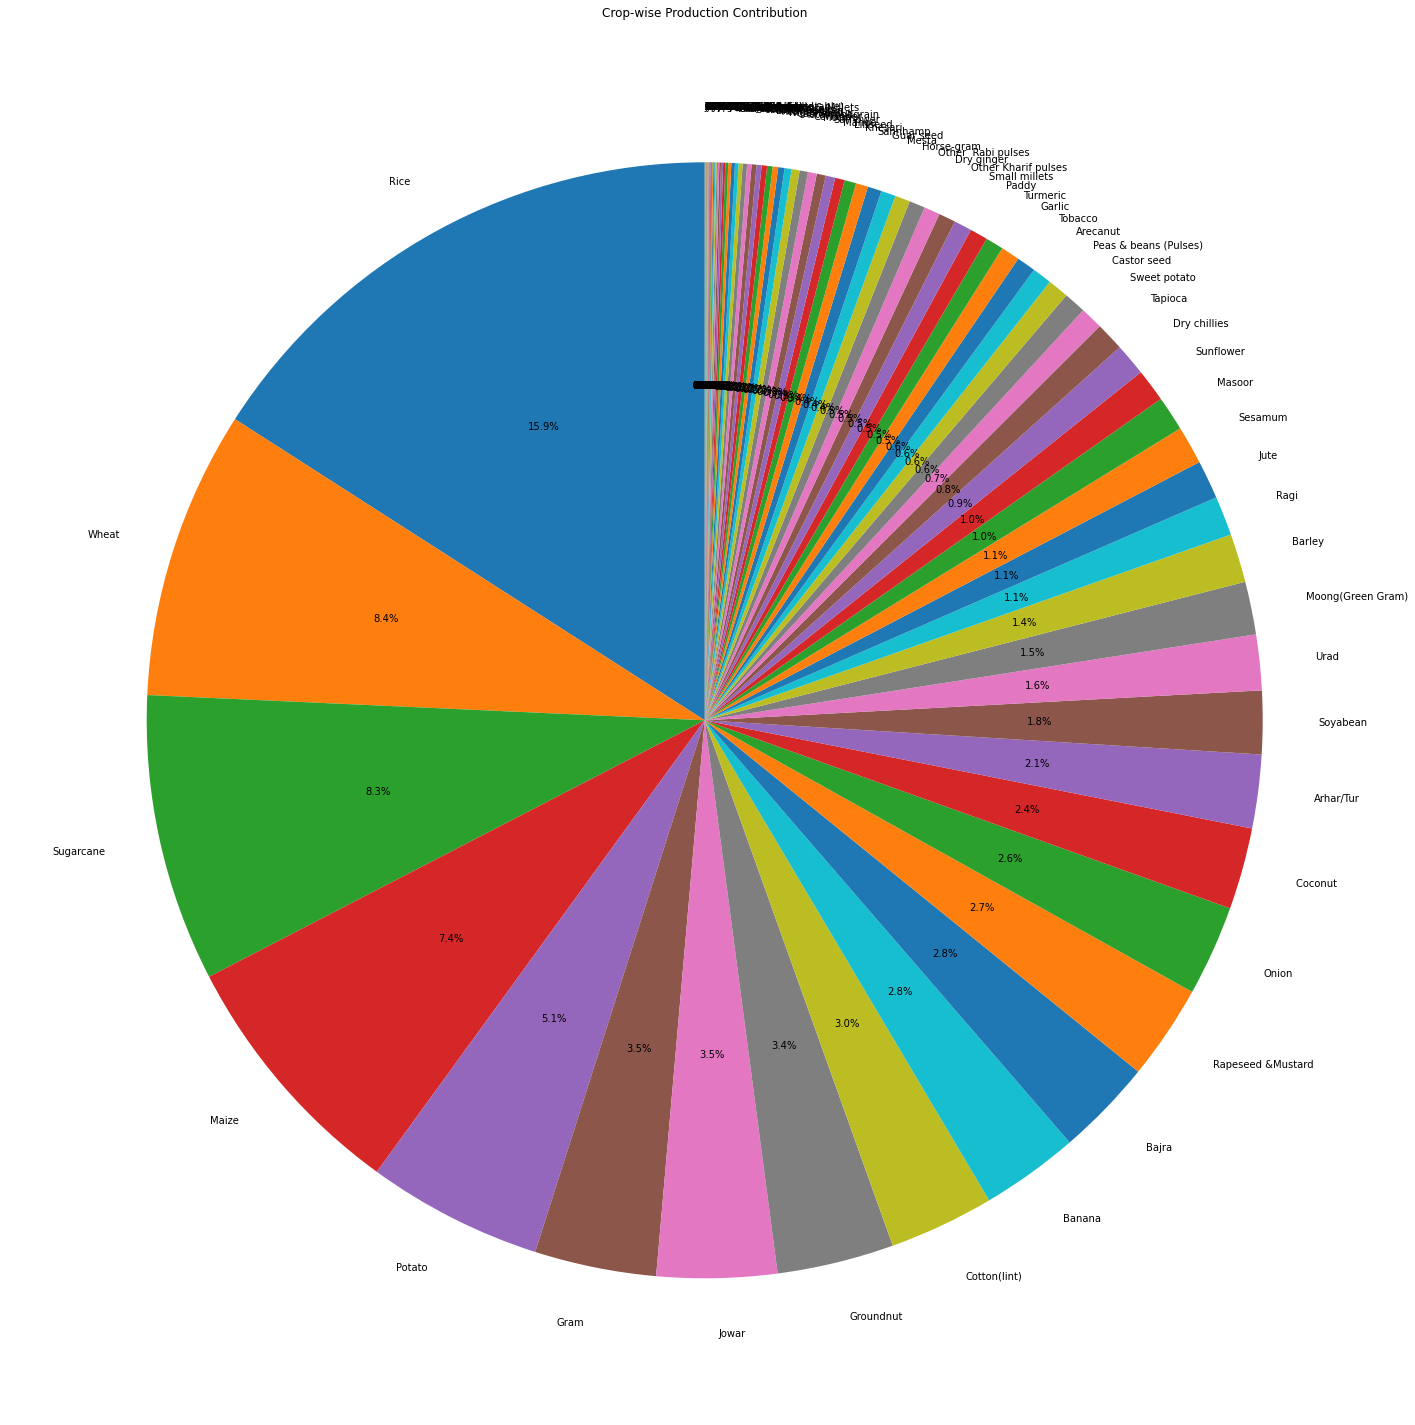

In [18]:
# Group the data by crop and compute the total production
grouped_data = data.groupby(['Crop'])['Production'].sum().reset_index()

# Sort the data by production in descending order
sorted_data = grouped_data.sort_values(by=['Production'], ascending=False)

# Create a pie chart
plt.figure(figsize=(25,600))
plt.pie(sorted_data['Production'], labels=sorted_data['Crop'], autopct='%1.1f%%', startangle=90)
plt.title('Crop-wise Production Contribution')
plt.show()

Year-wise trend in crop production: A line chart can be used to show the trend in crop production for a particular crop 
over the years. The x-axis can represent the years and the y-axis can represent the production in tonnes.The line chart 
can have a separate line for each crop to show their production trend.

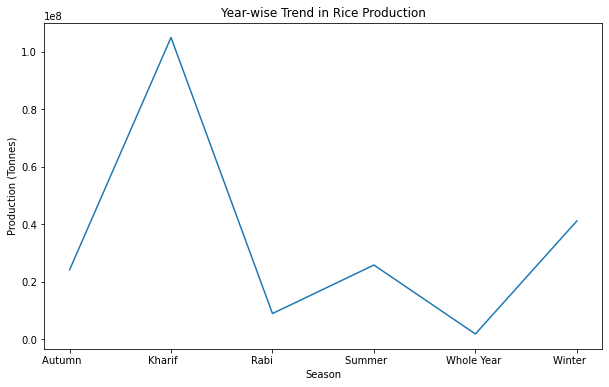

In [19]:

# Filter the data for a particular crop and group by year
grouped_data = data[data['Crop'] == 'Rice'].groupby('Season')['Production'].sum()

# Plot a line chart
grouped_data.plot(kind='line', figsize=(10,6))
plt.xlabel('Season')
plt.ylabel('Production (Tonnes)')
plt.title('Year-wise Trend in Rice Production')
plt.show()

Agro-climatic zone wise performance: A bar chart can be used to show the agro-climatic zone wise performance, where each
bar represents a different zone and the height of each bar represents the performance score.

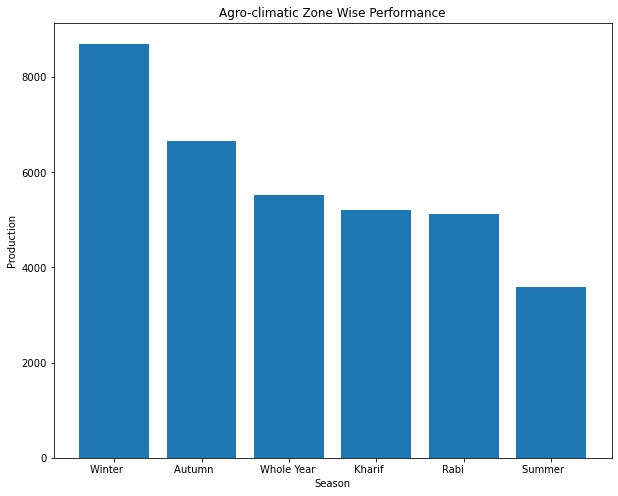

In [20]:

# Group the data by zone and compute the average performance score
grouped_data = data.groupby(['Season'])['Production'].mean().reset_index()

# Sort the data by performance score in descending order
sorted_data = grouped_data.sort_values(by=['Production'], ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(sorted_data['Season'], sorted_data['Production'])
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Agro-climatic Zone Wise Performance')
plt.show()

Formulating crop-related schemes and assessing their impacts: A box plot can be used to show the distribution of crop production
across different states. The x-axis can represent the states and the y-axis can represent the production in tonnes.The box plot
can show the minimum, maximum, median, and quartiles of production, providing insights into the variability of production across 
different states.

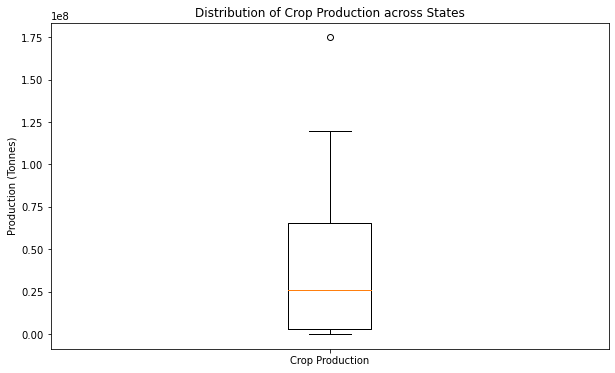

In [21]:
# Group the data by district/state and crop, and compute the total production
grouped_data = data.groupby(['State_Name'])['Production'].sum().reset_index()

# Plot a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data['Production'])
plt.xticks([1], ['Crop Production'])
plt.title('Distribution of Crop Production across States')
plt.ylabel('Production (Tonnes)')
plt.show()

# •Pre-processing.

Encoding is used to convert categorical data into a numerical format that can be used by machine learning algorithms.
This can include technique label encoding.

In [22]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# le = LabelEncoder()

# # Define the columns to encode
# columns_to_encode = ['State_Name','District_Name','Season','Crop']

# # Loop through each column and encode the categories
# for col in columns_to_encode:
#     encoded_col = le.fit_transform(data[col])
#     data[col] = encoded_col
import pickle
from sklearn.preprocessing import LabelEncoder
# Define columns to encode
columns_to_encode = ['State_Name','District_Name', 'Crop', 'Season']

# Apply label encoding to each column
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    # Save the encoder for future use
    with open(column+'_label_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

In [23]:
data   

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0
246089,32,471,2014,5,95,10860.0,19863.5


In [24]:
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# scaler = StandardScaler()

# # fit the scaler to the data and transform it
# scaled_data = scaler.fit_transform(data)

# # print the scaled data
# print(scaled_data)
# df_= scaled_data.astype(int)
# data=pd.DataFrame(df_,columns=['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area','Production'])

# •Feature engineering

constructing a heatmap to understand the correlation between the columns  

               State_Name  District_Name  Crop_Year    Season      Crop  \
State_Name       1.000000      -0.045012  -0.028258 -0.026078  0.013974   
District_Name   -0.045012       1.000000  -0.004657  0.016742 -0.005774   
Crop_Year       -0.028258      -0.004657   1.000000 -0.032866  0.002213   
Season          -0.026078       0.016742  -0.032866  1.000000  0.035954   
Crop             0.013974      -0.005774   0.002213  0.035954  1.000000   
Area             0.030069      -0.012599  -0.051246 -0.138270  0.071707   
Production       0.010602      -0.005842  -0.010804  0.024494  0.080425   

                   Area  Production  
State_Name     0.030069    0.010602  
District_Name -0.012599   -0.005842  
Crop_Year     -0.051246   -0.010804  
Season        -0.138270    0.024494  
Crop           0.071707    0.080425  
Area           1.000000    0.767170  
Production     0.767170    1.000000  


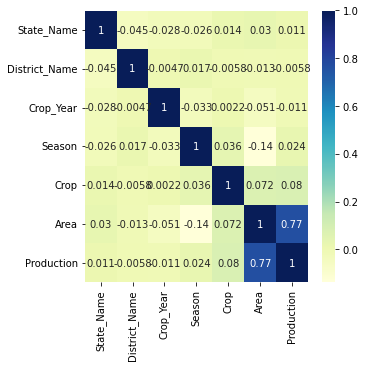

In [25]:
print(data.corr())
plt.figure(figsize=(5,5))

# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Sampling is used to reduce the size of a dataset, while preserving its key characteristics.
This can be useful because we are working with large datasets that are difficult to process.

In [26]:
df= data.astype(int)
sampled_df = df.sample(n=246090)
sampled_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
223971,30,401,1998,2,119,10860,19863
50946,6,272,2001,2,57,4612,1103
185057,27,508,2009,4,20,21,1
213467,30,222,2006,1,74,10860,11860
222665,30,388,2001,4,87,6769,19863


splitting the columns as features as x and label as y

In [27]:
from sklearn.model_selection import train_test_split
x = sampled_df[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']]
# y= data['Production']
y=sampled_df .drop(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area'],axis='columns')
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# scaler = StandardScaler()

# # fit the scaler to the data and transform it
# scaled_data = scaler.fit_transform(x)

# print the scaled data
# print(scaled_data)
# df_= scaled_data.astype(int)
# x=pd.DataFrame(df_,columns=['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area'])
# x

# [[-1.75240313  0.6159377  -1.14002752 -0.90936227 -1.9497635  -0.40642772]]

Split the dataset as training data and testing data

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()


• Model selection: Choose an appropriate algorithm for the problem and justify your choice.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define a list of model names and their corresponding hyperparameters
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=0.1)),
    ('Lasso Regression', Lasso(alpha=0.1)),
    ('Decision Tree Regression', DecisionTreeRegressor(max_depth=5,min_samples_split=5)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Define an empty dictionary to store the performance metrics for each model
metrics = {}

# Iterate over each model and train and evaluate it on the training data
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    metrics[name] = mse

# Print the performance metrics for each model
for name, mse in metrics.items():
    print(name, 'MSE:', mse)
    
# Select the best model based on the performance metrics
best_model_name = min(metrics, key=metrics.get)
best_model = next(model for model in models if model[0] == best_model_name)[1]
print('Best model:', best_model_name)

C:\Users\chanu\AppData\Local\Temp\ipykernel_1816\863795230.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Linear Regression MSE: 22504963.19235478
Ridge Regression MSE: 22504963.194805123
Lasso Regression MSE: 22504964.381844476
Decision Tree Regression MSE: 19141622.42385618
Random Forest Regression MSE: 5039320.765114476
Best model: Random Forest Regression


•Model optimization: Optimize the model by tuning its hyper-parameters and/or using regularization techniques.

In [48]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error



# # Define the parameter grid for the random forest regression model
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Instantiate the random forest regression model
# rf_model = RandomForestRegressor(random_state=42)

# # Perform grid search cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(x_train, y_train)

# # Get the best model from the grid search
# best_rf_model = grid_search.best_estimator_

# # Make predictions on the testing data using the best model
# y_pred = best_rf_model.predict(x_test)

# # Calculate the mean squared error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print("Random Forest Regression MSE:", mse)

Model training and evaluation:Train the model on the dataset and evaluate its performance using appropriate metrics.

In [49]:
# from sklearn.model_selection import GridSearchCV
# # loading the SVC model
# model = RandomForestRegressor()
# # hyperparameters

# parameters = {
#               'n_estimators': [50, 100, 150],
#               'random_state': [22,32,42]
             
# }


In [50]:
# # grid search
# classifier = GridSearchCV(model, parameters, cv=5)


In [51]:
# # fitting the data to our model
# classifier.fit(x_train, y_train)


In [52]:
# classifier.cv_results_

In [53]:
# # best parameters

# best_parameters = classifier.best_params_
# print(best_parameters)

In [54]:
# # higest accuracy

# highest_accuracy = classifier.best_score_
# print(highest_accuracy)

In [55]:
# # loading the results to pandas dataframe
# result = pd.DataFrame(classifier.cv_results_)

In [56]:
# result.head()

# Prediction

In [57]:
input_data = (0,427,2000,1,2,1254)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # # # standardize the data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data)
prediction =  model.predict(input_data_reshaped)
# y_pred = scaler.inverse_transform(prediction)

print(prediction)
# print(y_pred)

[1161.03]


C:\Users\chanu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
len(prediction)

1

In [41]:
for i in range(len(y_pred)):
  y_pred[i]=round(y_pred[i],2)
pd.DataFrame({'Actual':y_test,'y_pred':y_pred,'diff':(y_test-y_pred)})

,Actual,y_pred,diff
0,19863,16945.89,2917.11
1,20,26.49,-6.49
2,6,10.28,-4.28
3,1300,1252.69,47.31
4,3583,3475.73,107.27
...,...,...,...
49213,200,838.58,-638.58
49214,196,132.67,63.33
49215,55,49.61,5.39
49216,19863,19863.00,0.00


In [42]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_pred ) )

Mean absolute error: 865.74
Residual sum of squares (MSE): 5039320.77
R2-score: 0.91


In [43]:
print('Variance score: %.2f' % model.score(x_test,y_test))

Variance score: 0.91


In [44]:
# import pickle
# filename = 'CROP_PRODUCTION_prediction_pickle.sav'
# pickle.dump(model, open(filename, 'wb'))
# # loading the saved model
# loaded_model = pickle.load(open('CROP_PRODUCTION_prediction_pickle.sav', 'rb'))

In [45]:
# input_data = (0,427,2000,1,2,1254)
# input_data = ('Andaman and Nicobar Islands','NICOBARS',2000,'Kharif','Arecanut',1254.0)

# Load the label encoding mappings for categorical columns
state_label_encoder = pickle.load(open('State_Name_label_encoder.pkl', 'rb'))
district_label_encoder = pickle.load(open('District_Name_label_encoder.pkl', 'rb'))
crop_label_encoder = pickle.load(open('Crop_label_encoder.pkl', 'rb'))
season_label_encoder = pickle.load(open('Season_label_encoder.pkl', 'rb'))

# Get user input values from the webpage
state = 'Andaman and Nicobar Islands'
district = 'NICOBARS'
Crop_year=2000
season = 'Kharif'
crop = 'Arecanut'
Area=1254.0

from sklearn.preprocessing import LabelEncoder

# Define columns to encode
columns_to_encode = ['State_Name','District_Name', 'Crop', 'Season']

# Apply label encoding to each column
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    # Save the encoder for future use
    with open(column+'_label_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

# Convert categorical input values to numerical using label encoding
state_encoded = state_label_encoder.transform([state])[0]
district_encoded = district_label_encoder.transform([district])[0]
crop_encoded = crop_label_encoder.transform([crop])[0]
season_encoded = season_label_encoder.transform([season])[0]

# Create input array for the regression model
input_array = np.array([[state_encoded, district_encoded,Crop_year, crop_encoded, season_encoded, Area]])
input_data_reshaped = input_array.reshape(1,-1)
# Make prediction using the loaded regression model
production = model.predict(input_data_reshaped)


# # # # standardize the data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data)
# prediction =  model.predict(input_data_reshaped)
# y_pred = scaler.inverse_transform(prediction)

print(prediction)
# print(y_pred)

ValueError: y contains previously unseen labels: 'Kharif'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define columns to encode
columns_to_encode = ['State_Name','District_Name', 'Crop', 'Season']

# Apply label encoding to each column
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    # Save the encoder for future use
    with open(column+'_label_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)